In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import gensim
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()

Fact = StemmerFactory()
stemmer = Fact.create_stemmer()
# lemmatizer = WordNetLemmatizer()

In [3]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'dataset')

files = []
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        files.append(os.path.join(data_path, file))
        
print(files, len(files))

['C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\250 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\500_berita_indonesia.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\600 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\df_processed.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\Scrapping.csv'] 5


In [4]:
raw_data1 = pd.read_csv(files[1], sep = ';', encoding_errors = 'ignore')
raw_data2 = pd.read_csv(files[2], sep = ';', encoding_errors = 'ignore')
raw_data3 = pd.read_csv(files[4], sep = ';', encoding_errors = 'ignore')

In [5]:
raw_data1.sample(5)

,kategori,berita
135,valid,"Liputan6.com, Jakarta - Memasuki tahun kedua p..."
33,valid,"TEMPO.CO, Jakarta - Kepala Pusat Penelitian Po..."
478,hoax,"""Sejumlah anggota Komunitas Reyog Ponorogo (KR..."
284,hoax,"""Rumah Tahanan (Rutan) Mako Brimob, Kelapa Dua..."
366,hoax,"""1. Jika Kami Menang Gereja di Jakarta Harus L..."


In [6]:
raw_data2.sample(5)

,berita,tagging
52,Mungkin sebagian dari pembaca sudah pernah mem...,Valid
140,"Produk terbaru Apple, yakni iPhone 6 Plus mema...",Hoax
325,Badan Narkotika Nasional (BNN) mengimbau warga...,Valid
391,SEBAGIAN masyarakat dunia kini sedang menggand...,Valid
176,Komunitas Reog Ponorogo (KRP) berencana mengge...,Valid


In [7]:
raw_data3.sample(5)

,Label,Headline,Body,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
291,1,Klarifikasi Ridwan Kamil Terkait Tudingan Berm...,Gubernur Jawa Barat Kang Emil menyatakan foto ...,NaN,NaN,NaN,NaN
36,1,"Diduga Stres Setelah Cerai dengan Istrinya, Su...",Kepala Polres Kendal AKBP Adiwijaya menjelaska...,NaN,NaN,NaN,NaN
670,0,Fetus Soup Eaten by Asians? | Sop Bayi Dimaka...,An old hoax which already debunked in 2001: Th...,NaN,NaN,NaN,NaN
882,0,"Kepulauan Natuna Dicaplok China, Pemerintah D...",Sumber: https://www.facebook.com/aldi.bhumi/po...,NaN,NaN,NaN,NaN
730,0,Rumah Kosong Berhantu Beli Motor,Polisi memastikan kabar itu hoax. Kabar itu ho...,NaN,NaN,NaN,NaN


In [8]:
data3 = raw_data3.drop(columns = raw_data3.columns[3:])
data3.sample(5)

,Label,Headline,Body
1084,0,Lembaga Anti Koq Akan Dibuat Mabes Polri Bers...,Narasi: Lembaga ANTI HOAX Koq akan dibuat Mabe...
463,0,Rekruitmen PT. Angkasapura Airport,Beredar sebuah pesan berantai melalui WhatsApp...
735,0,Seorang polisi Israel mencekik seorang anak P...,Hoax ini sebelumnya sudah beredar dan debunked...
10,1,"Anggaran Tempat Sampah Jerman Rp 9,58 M, Dinas...","Setelah melakukan pertimbangan secara teknis, ..."
167,1,DITUDING MENCULIK DAN BERAT SEBELAH PADA KASUS...,Postingan ini berisi klarifikasi yang dibuat o...


In [9]:
data1 = raw_data1[['berita', 'kategori']]
data1.rename(columns = {'kategori' : 'label'}, inplace = True)

data2 = raw_data2.rename(columns = {'tagging' : 'label'})

data3 = raw_data3[['Body', 'Label']]
data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)

data1.columns, data2.columns, data3.columns


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10720\2853940649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)


(Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'))

In [10]:
df = pd.concat([data1, data2, data3], ignore_index = True)
df.sample(5)

,berita,label
1936,Sumber : Media Sosial Narasi : ABANG INI BUKAN...,0
1994,SUMBER : WHATSAPP NARASI : JANGAN MALAS UNTUK ...,0
397,"""Demonstrasi Mahasiswa Tidak Diliput Televisi ...",hoax
2032,SUMBER: Whatsapp dan Media Sosial NARASI: Obro...,0
1542,Sumber: Whatsapp Ringkasan: Tersebar isu melal...,0


In [11]:
df.label.unique()

array(['valid', 'hoax', 'Valid', 'Hoax', 1, 0], dtype=object)

In [12]:
df.label = df.label.replace(['valid', 'hoax', 'Valid', 'Hoax'], [0, 1, 0, 1])
df.label.unique()

array([0, 1], dtype=int64)

In [13]:
df.head()

,berita,label
0,"""Gunung Agung erupsi untuk pertama kali pada 2...",0
1,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ...",0
2,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri...",0
3,"""Jakarta - Dua anggota TNI, Serda N dan Serda ...",0
4,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ...",0


<Axes: xlabel='label'>

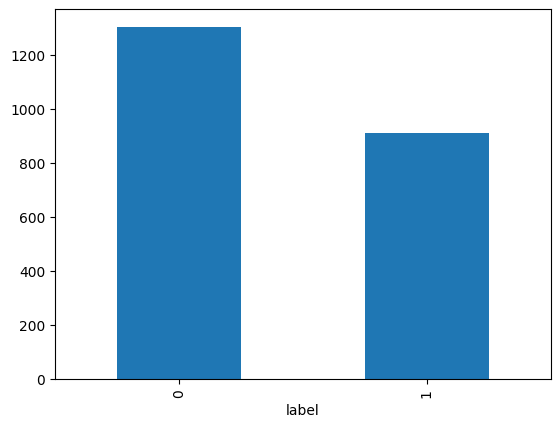

In [14]:
df.label.value_counts().plot(kind = 'bar')

In [15]:
df[df.duplicated()]

,berita,label
20,"""Jokowi Dapat Anugerah Adat Kehormatan Maluku""",0
21,"""Maluku, CNN Indonesia -- Presiden Joko Widodo...",0
80,"Bencana tanah longsor menerjang kota Mocoa, Ko...",0
175,"Serangan Bom Truk di Mogadishu, Somalia (14 Ok...",0
318,"""APA yang ada dalam pikiran Anda ketika meliha...",1
320,"""Jakarta, HanTer – Rencana pemerintah yang ing...",1
377,"""Ahok Bohong tentang Pengadaan Unit Busway dar...",1
472,"""Info dari BMKG besok diprediksi Bengkulu akan...",1
489,"""SMS Dukungan Buat Jokowi di Pilpres 2019, MUI...",1
490,"""China Menunggu Kekacauan Indonesia, Bila Indo...",1


In [16]:
df = df.drop_duplicates()
df[df.duplicated()]

,berita,label


In [17]:
df.shape

(2198, 2)

In [18]:
df.berita[0]

'"Gunung Agung erupsi untuk pertama kali pada 21 November 2017. Letusan terjadi pada pukul 17.05 Wita. Asap teramati bertekanan sedang dengan warna kelabu tebal dan dengan ketinggian maksimum sekitar 700 m di atas puncak. Abu letusan bertiup lemah ke arah Timur-Tenggara. Masyarakat diminta tetap tenang dan selalu mengikuti rekomendasi PVMBG. Gunung Agung yang terletak di Kabupaten Karangasem Provinsi Bali ini kembali erupsi pada Sabtu 25 November 2017 pukul 17.30 Wita. Abu bertekanan sedang setinggi 1.500 m keluar di atas puncak Gunung Agung. Ini merupakan erupsi kedua. Kepala Pusat Data Informasi dan Humas Badan Nasional Penanggulangan Bencana (BNPB) Sutopo Purwo Nugroho mengatakan, erupsi secara visual teramati dari daerah Culik dan Batulompeh ke arah Barat- Barat daya, asap kelabu-kehitaman tekanan sedang. Dia menuturkan, status Gunung Agung tetap Siaga (level 3). Hingga kemudian, Pusat Vulkanologi dan Mitigasi Bencana Geologi (PVMBG) menaikkan status Gunung Agung dari Siaga atau le

In [20]:
archive_path = os.path.join(data_path, 'archive', 'Summarized')
tempo_sum = pd.read_excel(os.path.join(archive_path, 'dataset_tempo_summarized.xlsx'), index_col = 'index')
cnn_sum = pd.read_excel(os.path.join(archive_path, 'dataset_cnn_summarized.xlsx'), index_col = 'index')
kompas_sum = pd.read_excel(os.path.join(archive_path, 'dataset_kompas_summarized.xlsx'), index_col = 'index')
tbhoax_sum = pd.read_excel(os.path.join(archive_path, 'dataset_turnbackhoax_summarized.xlsx'), index_col = 'index')

In [21]:
tempo_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
4906,"Jokowi Getol Minta Parpol Deklarasi Capres, Pe...","Kamis, 10 November 2022 09:27 WIB","TEMPO.CO, Jakarta - Direktur Eksekutif Paramet...",Jokowi;Capres;Pilpres 2024;Pemilu 2024;PDIP,Reporter M Julnis Firmansyah Editor Eko Ari Wi...,https://nasional.tempo.co/read/1655150/jokowi-...,"Jokowi Getol Minta Parpol Deklarasi Capres, Pe...",0,2022-11-10 09:27:00,48,Jajak pendapat FIRMANSYAH menunjukkan bahwa ti...
6366,Penjabat Bupati Lembata Resmikan Patung Anto E...,"Jumat, 27 Januari 2023 15:16 WIB","TEMPO.CO, Lewoleba - Penjabat Bupati Lembata, ...",Patung;Monumen;Pahlawan Nasional;Pahlawan;NTT,Reporter Yohanes Seo Editor Amirullah,https://nasional.tempo.co/read/1684686/penjaba...,Penjabat Bupati Lembata Resmikan Patung Anto E...,0,2023-01-27 15:16:00,109,Patung Anto Enga Tifaona rekan dan seniornya b...
2575,3 Rekomendasi Dewan Pakar di Rapimnas PKS,"Selasa, 21 Juni 2022 11:45 WIB","TEMPO.CO, Jakarta - Ketua Dewan Pakar Partai ...",PKS;Rapimnas PKS;Capres;Pemilu 2024,Reporter Mutia Yuantisya Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1604070/3-rekom...,3 Rekomendasi Dewan Pakar di Rapimnas PKS poin...,0,2022-06-21 11:45:00,69,Nama capres yang akan diusung pada Pilpres 202...
5570,Rumah untuk Jokowi Selepas Jabat Presiden di C...,"Sabtu, 17 Desember 2022 10:23 WIB","TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Jokowi;Rumah;Colomadu;Presiden,Reporter Fajar Pebrianto Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1669349/rumah-u...,Rumah untuk Jokowi Selepas Jabat Presiden di C...,0,2022-12-17 10:23:00,452,Peraturan Presiden Nomor 52 Tahun 2014 tentang...
6485,Anies Baswedan Bungkam Soal Pertemuan Surya Pa...,"Rabu, 1 Februari 2023 20:43 WIB","TEMPO.CO, Solo - Bakal Calon Presiden yang diu...",Anies Baswedan;NasDem;PKS;Demokrat;Surya Paloh...,Reporter Septia Ryanthie Editor Febriyan,https://nasional.tempo.co/read/1686617/anies-b...,Anies Baswedan Bungkam Soal Pertemuan Surya Pa...,0,2023-02-01 20:43:00,307,Anies tak mau komentari pertemuan NasDem denga...


In [22]:
cnn_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
4291,Megawati Minta Kader PDIP Turba untuk Menangka...,"Sabtu, 09 Jul 2022 01:08 WIB","Jakarta, CNN Indonesia -- Ketua Umum PDIP Mega...",megawati;megawati soekarnoputri;pdip;pilpres 2...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220708...,Megawati Minta Kader PDIP Turba untuk Menangka...,0,2022-07-09 01:08:00,382,Ketua Umum PDIP Megawati Soekarnoputri meminta...
2832,KSP soal Tudingan Skenario Dua Paslon: Yang At...,"Senin, 26 Sep 2022 19:50 WIB","Jakarta, CNN Indonesia -- Tenaga Ahli Utama Ka...",jokowi;andi arief;parpol;pipres 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220926...,KSP soal Tudingan Skenario Dua Paslon: Yang At...,0,2022-09-26 19:50:00,435,Presiden Jokowi tak memiliki kewenangan membua...
5349,"Honor Petugas Pemilu 2024 Naik, Ada yang Terim...","Rabu, 25 Mei 2022 16:33 WIB","Jakarta, CNN Indonesia -- Komisi Pemilihan Umu...",kpu;pemilu 2024;honor petugas tps,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220525...,"Honor Petugas Pemilu 2024 Naik, Ada yang Terim...",0,2022-05-25 16:33:00,236,Komisi Pemilihan Umum (KPU) menaikkan jumlah h...
5555,Formappi Kritik Kinerja Legislasi DPR yang Tak...,"Jumat, 13 Mei 2022 04:16 WIB","Jakarta, CNN Indonesia -- Forum Masyarakat Ped...",dpr;formappi;legislasi;uu tpks,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220512...,Formappi Kritik Kinerja Legislasi DPR yang Tak...,0,2022-05-13 04:16:00,476,Forum Masyarakat Peduli Parlemen Indonesia (Fo...
1651,Lautan Merah Ribuan Masyarakat Dayak Sambut Jo...,"Selasa, 29 Nov 2022 16:28 WIB","Jakarta, CNN Indonesia -- Presiden Joko Widodo...",jokowi;pontianak;dayak;ikn,CNN Indonesia,https://www.cnnindonesia.com/nasional/20221129...,Lautan Merah Ribuan Masyarakat Dayak Sambut Jo...,0,2022-11-29 16:28:00,235,Presiden Joko Widodo disambut lautan warga Suk...


In [23]:
kompas_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
672,G20 Diklaim Berhasil Tunjukkan Peran Politik B...,"17 November 2022, 19:27 WIB",Anggota DPR RI Maman Imanul Haq berpendapat ge...,News;G20;Gelaran G20;Anggota Dpr;Indonesia;Dpr...,NaN,https://video.kompas.com/watch/213066/g20-dikl...,G20 Diklaim Berhasil Tunjukkan Peran Politik B...,0,2022-11-17 19:27:00,166,Maman Imanul Haq berpendapat gelaran G20 yang ...
2537,Bawaslu: Jambi Masuk 10 Besar Indeks Kerawanan...,"Kompas.com - 23/09/2020, 21:10 WIB","JAMBI, KOMPAS.com - Bawaslu merilis Indeks Ker...",Jambi;Pilkada Jambi 2020,"Penulis Kontributor Jambi, Suwandi | Editor Ap...",http://regional.kompas.com/read/2020/09/23/211...,Bawaslu: Jambi Masuk 10 Besar Indeks Kerawanan...,0,2020-09-23 21:10:00,355,Bawaslu merilis Indeks Kerawanan Pemilu ( IKP ...
2644,ICW Ingatkan Partai Politik Tak Usung Mantan K...,"Kompas.com - 30/07/2020, 15:44 WIB","JAKARTA, KOMPAS.com - Indonesia Corruption Wat...",ICW;pilkada;eks koruptor;napi korupsi,Penulis Ardito Ramadhan | Editor Icha Rastika,http://nasional.kompas.com/read/2020/07/30/154...,ICW Ingatkan Partai Politik Tak Usung Mantan K...,0,2020-07-30 15:44:00,365,ICW mengingatkan partai politik dan penyelengg...
1483,Predikat WTP Dinilai Jadi Jualan Politik untuk...,"Kompas.com - 28/04/2022, 13:53 WIB","JAKARTA, KOMPAS.com - Pengamat politik dari UI...",wtp;Wajar Tanpa Pengecualian (WTP);Bupati Bogo...,Penulis Ardito Ramadhan | Editor Krisiandi,http://nasional.kompas.com/read/2022/04/28/135...,Predikat WTP Dinilai Jadi Jualan Politik untuk...,0,2022-04-28 13:53:00,157,Komisi Pemberantasan Korupsi (KPK ) menetapkan...
1311,"""Ini Pertunjukan Politik, Bukan Reshuffle Kabi...","Kompas.com - 15/06/2022, 17:11 WIB","JAKARTA, KOMPAS.com - Direktur Eksekutif Chart...",reshuffle kabinet;reshuffle kabinet 2022;reshu...,Penulis Vitorio Mantalean | Editor Sabrina Asril,http://nasional.kompas.com/read/2022/06/15/171...,"""Ini Pertunjukan Politik, Bukan Reshuffle Kabi...",0,2022-06-15 17:11:00,582,Direktur Eksekutif Charta Politika Yunarto Wij...


In [25]:
tbhoax_sum.sample(5)

,title,raw timestamp,original,tags,author,url,politik,raw narasi,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,,,
3542,[SALAH] Vaksin Covid-19 Merusak Sel Otak dan S...,2021-04-06 00:00:00,Hasil Periksa Fakta Nadine Salsabila Naura Mar...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/04/06/salah-vaksi...,0,“Allahuakhbar.Darah berubah lepas kena…………..B...,Allahuakhbar.Darah berubah lepas kena ..BUKTI ...,1,2021-04-06,529,Dua paper penelitian yang dipublikasikan dalam...
124,[SALAH] Tangkapan Layar Artikel “Kabar Baik! P...,"Februari 20, 2023",Hasil Periksa Fakta Luthfiyah OJ (UIN Raden Ma...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/20/salah-tangk...,0,"“Kabar Baik! Pria Yang Tak Divaksin, Spermanya...","Kabar Baik! Pria Yang Tak Divaksin, Spermanya ...",1,2023-02-20,22,"Pria yang Tak Divaksin, Spermanya Akan Berharg..."
3036,[SALAH] Email dari PT Pos Indonesia Terkait Ke...,"Juli 5, 2021",Hasil Periksa Fakta Khairunnisa Andini (Univer...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/07/05/salah-email...,1,\n“Pelanggan yang terhormat\nPaket Anda tidak ...,Pelanggan yang terhormat Paket Anda tidak dapa...,1,2021-07-05,222,Pemrosesan PT Pos Indonesia. (selanjutnya dise...
3966,[SALAH] Video “Tolongin kita” Google Earth Pul...,"Januari 20, 2021","FAKTANYA, selain karena ELT (Emergency Locator...",Fitnah;Hasut;Hoax,Aribowo Sasmito,https://turnbackhoax.id/2021/01/20/salah-video...,0,,NaN,1,2021-01-20,3,NaN
5013,[SALAH] “Ustadz Abdul Somad: FACE BOOK HARAM”,2020-09-07 00:00:00,Gambar editan / suntingan. Gambar aslinya beri...,Fitnah;Hasut;Hoax,Adi,https://turnbackhoax.id/2020/09/07/salah-ustad...,0,,NaN,1,2020-09-07,3,NaN


In [ ]:
def pipeline(text):
    text = re.sub(r'http\S+', '', text.lower())
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("","",string.punctuation))
#     text = tokenizer(text)
    text = stemmer.stem(text)
    text = stopword.remove(text)
    return text.split()

pipeline(df.berita[0])

In [ ]:
X_processed = X.apply(lambda x : pipeline(x))

df_processed = pd.DataFrame({
    'berita' : X_processed,
    'label' : y
})

# df_processed.to_csv(os.path.join(data_path, 'df_processed.csv'))